### Homework 01

Name: Yining Liu  
Github Username: Lynzz1701    
USC ID: 6168529797 

#### 1(b)i Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, neighbors, metrics

df = pd.read_csv("../data/vertebral_column_data/column_2C.dat", header = None, sep = " ", 
                 names=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 
                        'pelvic_radius', 'grade_of_spondylolisthesis','label'])

df
#convert to 0&1 later

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


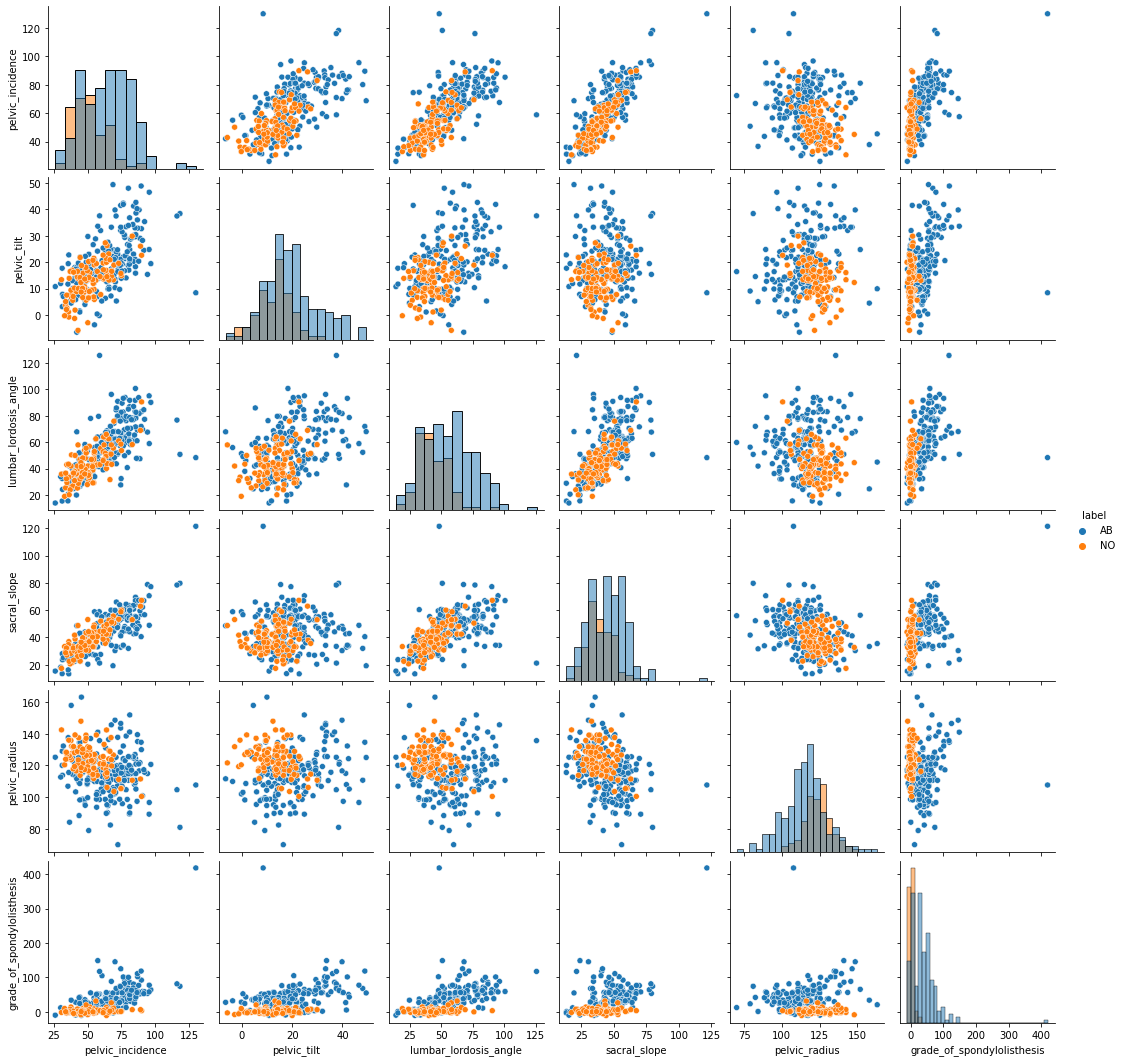

In [2]:
sns.pairplot(df, hue = 'label', vars=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                                      'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis'], 
             diag_kind="hist")

#### 1(b)ii  Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

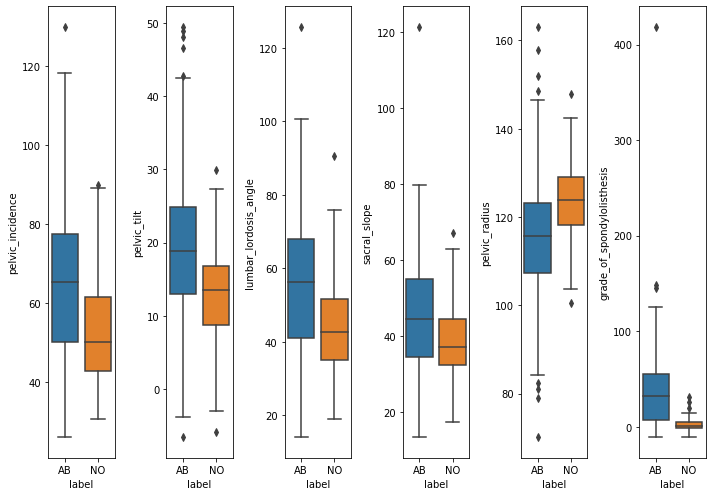

In [3]:
fig, axes = plt.subplots(1,6,figsize = (10,7))

sns.boxplot(ax = axes[0], x='label',y='pelvic_incidence',data=df,orient='v')
sns.boxplot(ax = axes[1], x='label',y='pelvic_tilt',data=df,orient='v')
sns.boxplot(ax = axes[2], x='label',y='lumbar_lordosis_angle',data=df,orient='v')
sns.boxplot(ax = axes[3], x='label',y='sacral_slope',data=df,orient='v')
sns.boxplot(ax = axes[4], x='label',y='pelvic_radius',data=df,orient='v')
sns.boxplot(ax = axes[5], x='label',y='grade_of_spondylolisthesis',data=df,orient='v')
#any Efficient way to put this?

fig.tight_layout()

#### 1(b)iii  Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set

In [4]:
le = preprocessing.LabelEncoder()
df['label'] = 1 - le.fit_transform(df['label'])#impressive!!!!
df
#should we append a new column?

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


In [5]:
data_class_1 = df[df.label == 1]
data_class_0 = df[df.label == 0]
cnt1 = data_class_1.shape[0]
cnt0 = data_class_0.shape[0]
print(cnt1, cnt0)
train = pd.concat([data_class_1[:140],data_class_0[:70]])
test = pd.concat([data_class_1[140:],data_class_0[70:]])
print(train.shape)
print(test.shape)

210 100
(210, 7)
(100, 7)


#### 1(c)ii  Test all the data in the test database with k nearest neighbors

In [6]:
X_train, X_test = train.iloc[:,:6], test.iloc[:,:6]
y_train, y_test = train.label, test.label

print('X_train.shape:', X_train.shape, 'X_test.shape:', X_test.shape)
print('y_train.shape:', y_train.shape, 'y_test.shape:', y_test.shape)

k_range = range(208,0,-3)
train_errors = list()
test_errors = list()

#weights=uniform for majority polling, metric=euclidean/p=2 do the same, algo=auto
#those 3 all by default 
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_errors.append(1 - knn.score(X_train, y_train))
    test_errors.append(1 - knn.score(X_test, y_test))
    
#print('train errors:',train_errors)
#print('test errors:', test_errors)

X_train.shape: (210, 6) X_test.shape: (100, 6)
y_train.shape: (210,) y_test.shape: (100,)


#### Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order)

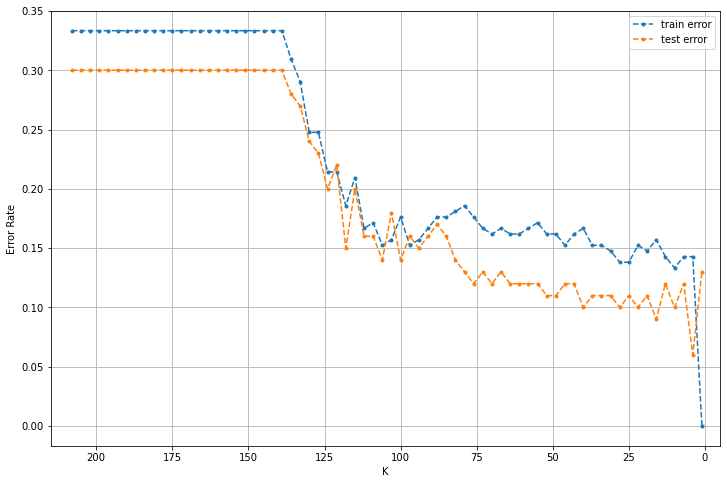

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(k_range, train_errors, '--', marker = '.', label='train error')
plt.plot(k_range, test_errors, '--', marker = '.', label='test error')

#reverse x axis
plt.xlim(215,-5)
plt.grid()
plt.legend()
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#### Which k* is the most suitable k among those values? 
#### Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*

In [8]:
print('lowest_test_error =',min(test_errors))
print('obtained when k* =',k_range[test_errors.index(min(test_errors))])

lowest_test_error = 0.06000000000000005
obtained when k* = 4


In [9]:
k_star = 4
knn_star = neighbors.KNeighborsClassifier(n_neighbors=k_star)
knn_star.fit(X_train, y_train)
preds = knn_star.predict(X_test)

CM = metrics.confusion_matrix(y_test, preds)
print('Confusion Matrix when k* = 4:')
print(CM)

#F1 = 2 * (precision * recall) / (precision + recall)
TNR = CM[0,0]/(CM[0,0]+CM[0,1])
TPR = CM[1,1]/(CM[1,0]+CM[1,1]) #recall
precision = CM[1,1]/(CM[0,1]+CM[1,1])
f1_score = 2 * (precision * TPR) / (precision + TPR)

print('true positive rate = ', TPR)
print('true negative rate = ', TNR)
print('Precision =', precision)
print('F_1 score =', f1_score)

#metrics.f1_score(y_test, preds)

Confusion Matrix when k* = 4:
[[25  5]
 [ 1 69]]
true positive rate =  0.9857142857142858
true negative rate =  0.8333333333333334
Precision = 0.9324324324324325
F_1 score = 0.9583333333333333


#### 1(c)iii  Plot the best test error rate

In [10]:
best_test_errors = list()
optimal_k = list()

n_range = range(10,211,10)
for n in n_range:
    train = pd.concat([data_class_1[:n-(n//3)],data_class_0[:(n//3)]])
    X_train, y_train = train.iloc[:,:6], train.label
    #print(X_train)
    #print(y_train)
    k_range = range(1,n,5)
    test_errors = list()
    
    for k in k_range:
        knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        test_errors.append(1 - knn.score(X_test, y_test))
        
    #print(len(test_errors))
    #print('--')
    best_test_errors.append(min(test_errors))
    optimal_k.append(k_range[test_errors.index(min(test_errors))])
    
print('optimal k:',optimal_k)
print('best test errors:', best_test_errors)

optimal k: [1, 6, 1, 11, 26, 21, 26, 31, 41, 6, 6, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6]
best test errors: [0.25, 0.19999999999999996, 0.21999999999999997, 0.25, 0.30000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.25, 0.21999999999999997, 0.17000000000000004, 0.16000000000000003, 0.15000000000000002, 0.13, 0.13, 0.13, 0.09999999999999998, 0.08999999999999997, 0.08999999999999997, 0.07999999999999996]


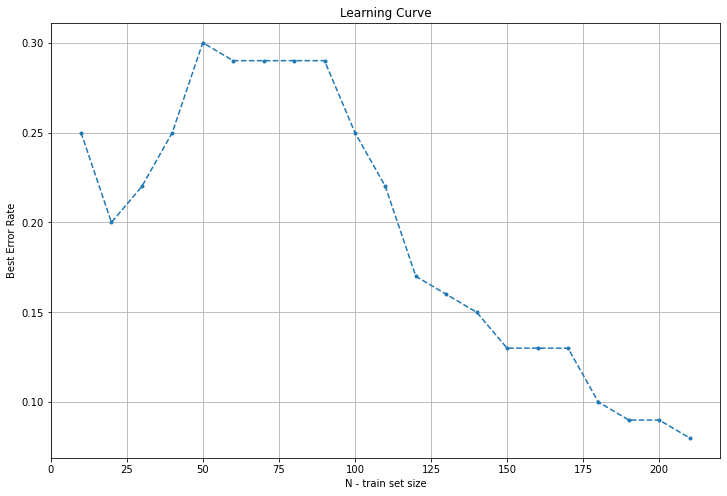

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(n_range, best_test_errors, '--', marker = '.')
plt.title('Learning Curve')
plt.grid()
plt.xlabel('N - train set size')
plt.ylabel('Best Error Rate')
plt.show()

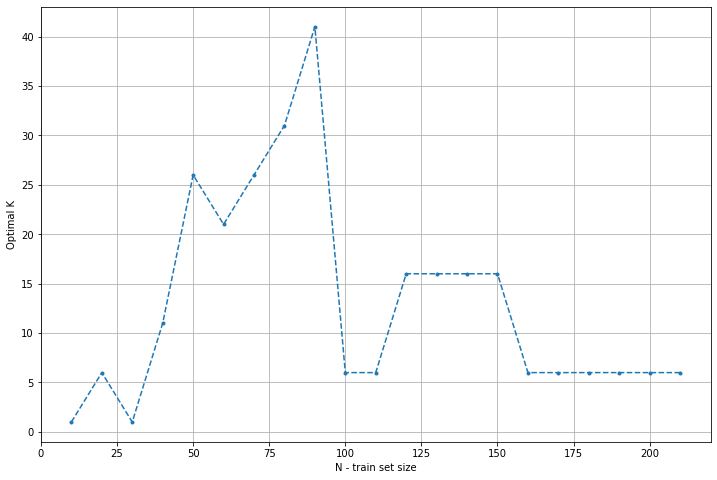

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(n_range, optimal_k, '--', marker = '.')

plt.grid()
plt.xlabel('N - train set size')
plt.ylabel('Optimal K')
plt.show()

#### 1(d)i  Minkowski Distance

In [13]:
k_range = range(1,197,5)

X_train, X_test = train.iloc[:,:6], test.iloc[:,:6]
y_train, y_test = train.label, test.label

#metric=manhattann/p=1 do the same
test_errors1 = list()
for k in k_range:
    knn_m = neighbors.KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_m.fit(X_train, y_train)
    test_errors1.append(1 - knn_m.score(X_test, y_test))

lowest_test_error_m = min(test_errors1)
k_star_manhattann = k_range[test_errors1.index(min(test_errors1))]
print('Manhattan Distance(p=1): k* =', k_star_manhattann, ',with test error', lowest_test_error_m)

#log_10^p = (0.1...1),with k = k_star_manhattann
p_index_range = np.linspace(0.1,1,10)
test_errors2 = list()
for p_index in p_index_range:
    knn_p = neighbors.KNeighborsClassifier(n_neighbors=k_star_manhattann, p = 10**p_index)
    knn_p.fit(X_train, y_train)
    test_errors2.append(1 - knn_p.score(X_test, y_test))
    
lowest_test_error_p_index = min(test_errors2)
optimal_p_index = p_index_range[test_errors2.index(min(test_errors2))]
print('best log_10(p) =', optimal_p_index, 'with test error', lowest_test_error_p_index)

#metric=chebyshev/p=inf do the same
test_errors3 = list()
for k in k_range:
    knn_c = neighbors.KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn_c.fit(X_train, y_train)
    test_errors3.append(1 - knn_c.score(X_test, y_test))

lowest_test_error_c = min(test_errors3)
k_star_chebyshev = k_range[test_errors3.index(min(test_errors3))]
print('Chebyshev Distance(p=inf): k* =', k_star_chebyshev, ',with test error', lowest_test_error_c)



Manhattan Distance(p=1): k* = 6 ,with test error 0.10999999999999999
best log_10(p) = 0.6 with test error 0.06000000000000005
Chebyshev Distance(p=inf): k* = 16 ,with test error 0.07999999999999996


#### 1(d)ii  Mahalanobis Distance

In [14]:
test_errors4 = list()
V = np.cov(X_train, rowvar=False)
VI = np.linalg.inv(V)

for k in k_range:
    knn_maha = neighbors.KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI':VI})
    knn_maha.fit(X_train, y_train)
    test_errors4.append(1 - knn_maha.score(X_test, y_test))
    
lowest_test_error_maha = min(test_errors4)
k_star_maha = k_range[test_errors4.index(min(test_errors4))]
print('Mahalanobis Distance: k* =', k_star_maha, ',with test error', lowest_test_error_maha)

Mahalanobis Distance: k* = 1 ,with test error 0.17000000000000004


#### Summarize the test errors (i.e., when k = k∗) in a table.

In [15]:
sum_data = {'metirc':  ['Manhattan Distance(p=1)', 'log_10(p)=0.1', 'log_10(p)=0.2', 'log_10(p)=0.3',
                       'log_10(p)=0.4', 'log_10(p)=0.5', 'log_10(p)=0.6', 'log_10(p)=0.7', 'log_10(p)=0.8',
                       'log_10(p)=0.9', 'log_10(p)=1', 'Chebyshev Distance(p=inf)', 'Mahalanobis Distance'],
            'test error': [lowest_test_error_m, test_errors2[0], test_errors2[1], test_errors2[2],
                           test_errors2[3], test_errors2[4], test_errors2[5], test_errors2[6],test_errors2[7],
                           test_errors2[8], test_errors2[9], lowest_test_error_c, lowest_test_error_maha],
            "k*": [k_star_manhattann]*11 + [k_star_chebyshev, k_star_maha]
           }

pd.DataFrame(sum_data)

,metirc,test error,k*
0,Manhattan Distance(p=1),0.11,6
1,log_10(p)=0.1,0.09,6
2,log_10(p)=0.2,0.09,6
3,log_10(p)=0.3,0.08,6
4,log_10(p)=0.4,0.08,6
5,log_10(p)=0.5,0.08,6
6,log_10(p)=0.6,0.06,6
7,log_10(p)=0.7,0.07,6
8,log_10(p)=0.8,0.08,6
9,log_10(p)=0.9,0.09,6


#### 1(e) Weighted Decision

In [16]:
#metric = euclidean,manhattan,chebyshev
#with weights = distance

test_errors_e, test_errors_m, test_errors_c = list(),list(),list()

X_train, X_test = train.iloc[:,:6], test.iloc[:,:6]
y_train, y_test = train.label, test.label

for k in k_range:
    knn_e = neighbors.KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    knn_e.fit(X_train, y_train)
    test_errors_e.append(1 - knn_e.score(X_test, y_test))
    
    knn_m = neighbors.KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
    knn_m.fit(X_train, y_train)
    test_errors_m.append(1 - knn_m.score(X_test, y_test))

    knn_c = neighbors.KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights='distance')
    knn_c.fit(X_train, y_train)
    test_errors_c.append(1 - knn_c.score(X_test, y_test))

lowest_test_error_e = min(test_errors_e)
k_star_e_w = k_range[test_errors_e.index(min(test_errors_e))]
lowest_test_error_m = min(test_errors_m)
k_star_m_w = k_range[test_errors_m.index(min(test_errors_m))]
lowest_test_error_c = min(test_errors_c)
k_star_c_w = k_range[test_errors_c.index(min(test_errors_c))]

print('with weighted decision:')
print('euclidean obtains', lowest_test_error_e, 'when k =', k_star_e_w)
print('manhattan obtains', lowest_test_error_m, 'when k =', k_star_m_w)
print('chebyshev obtains', lowest_test_error_c, 'when k =', k_star_c_w)

with weighted decision:
euclidean obtains 0.09999999999999998 when k = 6
manhattan obtains 0.09999999999999998 when k = 26
chebyshev obtains 0.10999999999999999 when k = 16


#### 1(f) What is the lowest training error rate you achieved in this homework

Training error rate yields 0 whenever we set k to 1.  
In this case, all testing data are already in the training data, thus KNN always chooses sample itself as the nearest neighbor and could never misclassify.